##### Austin Animal Shelter Analysis

## Context

The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year. As part of the AAC's efforts to help and care for animals in need, the organization makes available its accumulated data and statistics as part of the city of Austin's Open Data Initiative.

## Data

The data contains intakes and outcomes of animals entering the Austin Animal Center from the beginning of October 2013 to the present day.

## Analysis

- What are the most common reasons for intake?
- What are the most common breeds per species?
- What are the most common or average ages of animals taken in?
- What were the reasons the animal was put down?
- Percantages of adoption vs. transfer

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Open, Read and Save CVS to Variable
# Intakes
intakes = pd.read_csv('aac_intakes.csv', index_col=0, encoding = "ISO-8859-1")
intakes.fillna('Unknown', inplace=True)

# Outcomes
outcomes = pd.read_csv('aac_outcomes.csv', index_col=0, encoding = "ISO-8859-1")
outcomes.fillna('Unknown', inplace=True)

# Intakes and Outcomes
in_out = pd.read_csv('aac_intakes_outcomes.csv', index_col=0, encoding = "ISO-8859-1")
in_out.fillna('Unknown', inplace=True)

### First five entries of each data set.

In [2]:
intakes.head()

,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
age_upon_intake,,,,,,,,,,,
8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,Unknown,Intact Female
4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male


In [3]:
outcomes.head()

,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
age_upon_outcome,,,,,,,,,,,
2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,Unknown,Partner,Transfer,Intact Male
1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,Unknown,Adoption,Neutered Male
9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,Unknown,Rabies Risk,Euthanasia,Unknown


In [4]:
in_out.head()

,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
age_upon_outcome,,,,,,,,,,,,,,,,,,,,,
10 years,A006100,2007-07-09 00:00:00,Unknown,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
7 years,A006100,2007-07-09 00:00:00,Unknown,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
6 years,A006100,2007-07-09 00:00:00,Unknown,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
16 years,A134067,1997-10-16 00:00:00,Unknown,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


### Distribution of Intakes based on species.

First, I'm interested in seeing how many animals there are altogether. From there, I'll figure out how many there are total for each type represented in the data and what percentage it takes from the total.

,Total,%
Dog,45743,57.05
Cat,29659,36.99
Other,4434,5.53
Bird,342,0.43
Livestock,9,0.01


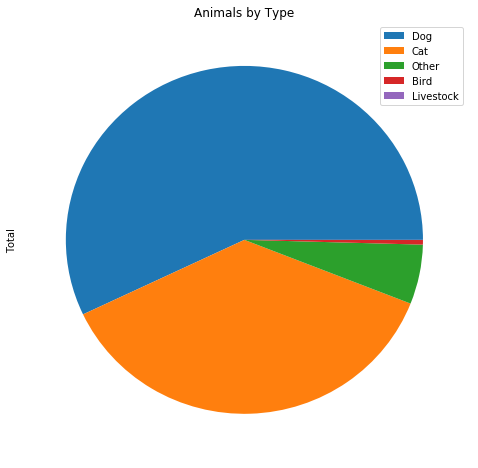

In [5]:
# Sum up each unique value in the dataset and then store it in a dictionary for access.
total_by_species = intakes['animal_type'].value_counts().to_dict()

# Variables that contain the totals of each, the over all totals, and the categories.
num_results = []
total_animals = len(intakes['animal_type'])
labels = ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']

# Iterating through the dictionary to populate the total number results of each type.
for x in total_by_species:
    num_results.append(total_by_species[x])

# Creating a new Dataset that only contains the animal types and their sum.
total_df = pd.DataFrame({"Total": num_results}, index=labels)

# Getting the percentage of the animal totals and adding it to the aformentioned dataset
total_df['%'] = round(((total_df['Total'] / total_animals) * 100), 2)
total_df

### And the results are in the doghouse...

Looks like dogs make up a little over half of the grand total of animals taken in by AAC, and everything else takes up the other half together.

Let's investigate the dogs, then. 

In [6]:
# Make a new DataFrame where only the dogs are listed.
dog_df = intakes.loc[intakes['animal_type'] == 'Dog']

dog_df.head()

,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
age_upon_intake,,,,,,,,,,,
8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male
2 years,A708452,Dog,Labrador Retriever Mix,Black/White,2015-07-30T14:37:00.000,2015-07-30T14:37:00.000,Austin (TX),Normal,Public Assist,Mumble,Intact Male


### Sniffing out more details

Well, there's a lot of things that can make up a dog. I'd like to know a few more things about the dogs at AAC.

- Their ages: Whether they were a puppy, an adult, or an elder.
- Their sexes.
- Their spay/neutered status.
- Their breed.

Tricky thing is that dogs mature at different rates depending on breeds so I'll just throw ballpark estimates.
Small dogs typically mature between 9-12 months, while large breeds can take up to two years.

I'll leave it as anything:
    - Under 1 year will be a puppy.
    - Between 1 and 2 years will be young.
    - Between 3 to 8 years will be an adult.
    - Over 8 years, let's call them a senior.
    
The category 'age_upon_intake' will need to be dug through. Anything with 'years' moved to adult, and without will be a puppy.

In [7]:
# Dataframe of all dogs who are at least a year.
grown_dogs_df = dog_df.filter(regex='year*.', axis=0)
grown_dogs_df = grown_dogs_df.copy()

# Dataframe of all dogs who are under a year, in months or weeks.
puppies_df = dog_df.filter(regex='week*.|month*.', axis=0)

### Ain't that a doggone shame...

So, the ages of these animals are in strings and they aren't consistent. Dogs are being aged in weeks, months, and years in both singular and plurals.

Since I've seperated they so far with under a year or over, I can clean the data up. 

I reckon I can do that by
- Dropping 'year(s)' from the adult dataframe.
- Adding it as a new column with the name 'Age(years)'
- Dropping 'week(s)|month(s)' from the puppy dataframe
- Adding it as a new column with the name 'Age(Months)'
- Adding a boolean column to state whether a dog is an adult or not.

In [8]:
def getAges(data, measurement):
    ages = []
    # Iterate through the indexes (that are strings with the format of n year(s))
    for x in data.index:
        # Split the string and drop the year/years word to get the sole number and covert it to an integer
        age = int(x.split().pop(0))
        # Add it to the list
        ages.append(age)
    # Create column with the values of the age list
    data[measurement] = ages

getAges(grown_dogs_df, 'ages_in_years')

# Since ages now have their own column, here I reset the index naming to numbers.
grown_dogs_df = grown_dogs_df.reset_index().copy()

# Drop the age column in favor of the interger-based one I just added
grown_dogs_df = grown_dogs_df.drop(['age_upon_intake'], axis=1).copy()

In [9]:
def getSexes(data):
    genders = []
    fixed = []
    
    # Iterate through the strings found in the sex column
    for x in data['sex_upon_intake']:
        y = str(x)
        word_list = y.split()
        if len(word_list) == 2:
            status = word_list[0].lower()
            gender = word_list[1].lower()
            genders.append(gender)
            if status == 'intact':
                fixed.append(0)
            else:
                fixed.append(1)
        else:
            genders.append('unknown')
            fixed.append(0)
    data['sex'] = genders
    data['fixed'] = fixed

getSexes(grown_dogs_df)

In [10]:
# Add Adult Category : Young (< 2), Adult (> 2 and < 8), or Senior (> 8)

def getLifeStage(data):
    stage = []
    for x in data['ages_in_years']:
        if x <= 2:
            stage.append('young')
        elif (x > 2) and (x < 8):
            stage.append('adult')
        elif x >= 8:
            stage.append('senior')
        else:
            stage.append('unknown')
    data['stage'] = stage

getLifeStage(grown_dogs_df)

grown_dogs_df = grown_dogs_df.drop(['sex_upon_intake'], axis=1).copy()

### The easier data is cleaned up enough...

I've separated sex values to list the biological sex independen of the animal being spayed/neutered or not.
I've made the string ages into intergers and added a 'life stage' category.

This still leaves us with the breed and colors but those, I see, are  a bit more haphazardly categorized. 
I decided to group them and get a feel of how they're listed.

In [11]:
grown_dogs_df.head()

,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,ages_in_years,sex,fixed,stage
0,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,8,female,1,senior
1,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,4,male,1,adult
2,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,2,male,1,young
3,A708452,Dog,Labrador Retriever Mix,Black/White,2015-07-30T14:37:00.000,2015-07-30T14:37:00.000,Austin (TX),Normal,Public Assist,Mumble,2,male,0,young
4,A760053,Dog,Chihuahua Shorthair,White/Tan,2017-10-11T15:46:00.000,2017-10-11T15:46:00.000,8800 South First Street in Austin (TX),Normal,Stray,Unknown,2,male,0,young


In [12]:
dog_breeds = grown_dogs_df.groupby(['breed']).size()
dog_colors = grown_dogs_df.groupby(['color']).size()
len(dog_breeds)

1631

Over a thousand breed combinations!
I figure I'll divide breeds into two categories, Breed1 and Breed 2 then a boolean for if it's a mix or not...

As for colors? Perhaps a main color, a secondary color..

In [13]:
def getBreeds(data):
    breeds1 = []
    breeds2 = []
    isMixed = []
    
    for x in data['breed']:
        splitX = x.split("/")
        breed1 = ''
        breed2 = ''
        if len(splitX) >= 2:
            breed1 = splitX[0].lower()
            breed2 = splitX[1].lower()
            isMixed.append(1)
        else:
            breed1 = splitX[0].lower()
            breed2 = 'none'
            if "mix" in breed1:
                splitAgain = breed1.split(' mix')
                breed1 = splitAgain[0]
                breed2 = 'mix'
                isMixed.append(1)
            else:
                isMixed.append(0)

        breeds1.append(breed1)
        breeds2.append(breed2)
    
    data['breed1'] = breeds1
    data['breed2'] = breeds2
    data['is_Mix'] = isMixed

getBreeds(grown_dogs_df)

In [14]:
def getColors(data):
    colors1 = []
    colors2 = []
    
    for x in data['color']:
        colorSplit = x.split('/')
        color1 = ''
        color2 = ''
        if len(colorSplit) == 2:
            color1 = colorSplit[0].lower()
            color2 = colorSplit[1].lower()
        else:
            color1 = colorSplit[0].lower()
            color2 = 'none'
        
        colors1.append(color1)
        colors2.append(color2)
    
    data['color1'] = colors1
    data['color2'] = colors2

getColors(grown_dogs_df)

grown_dogs_df = grown_dogs_df.drop(['breed', 'color'], axis=1)
grown_dogs_df.head()

,animal_id,animal_type,datetime,datetime2,found_location,intake_condition,intake_type,name,ages_in_years,sex,fixed,stage,breed1,breed2,is_Mix,color1,color2
0,A706918,Dog,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,8,female,1,senior,english springer spaniel,none,0,white,liver
1,A682524,Dog,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,4,male,1,adult,doberman pinsch,australian cattle dog,1,tan,gray
2,A743852,Dog,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,2,male,1,young,labrador retriever,mix,1,chocolate,none
3,A708452,Dog,2015-07-30T14:37:00.000,2015-07-30T14:37:00.000,Austin (TX),Normal,Public Assist,Mumble,2,male,0,young,labrador retriever,mix,1,black,white
4,A760053,Dog,2017-10-11T15:46:00.000,2017-10-11T15:46:00.000,8800 South First Street in Austin (TX),Normal,Stray,Unknown,2,male,0,young,chihuahua shorthair,none,0,white,tan


In [15]:
total_intake_type = grown_dogs_df.groupby(['intake_type']).size().reset_index(name='Total')
total_intake_condition = grown_dogs_df.groupby(['intake_condition']).size().reset_index(name='Total')
total_intake_condition = total_intake_condition.sort_values(by=['Total']).reset_index()
total_intake_condition = total_intake_condition.drop(['index'], axis=1)

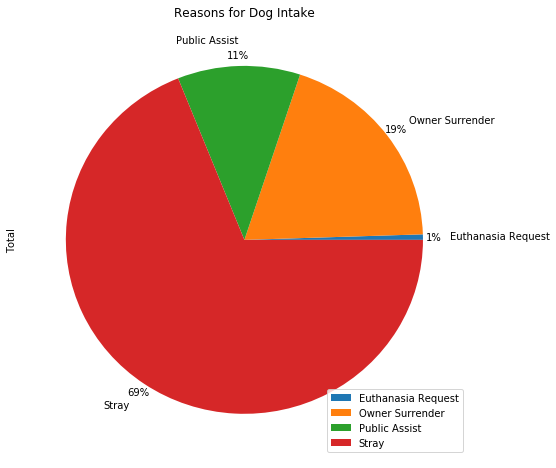

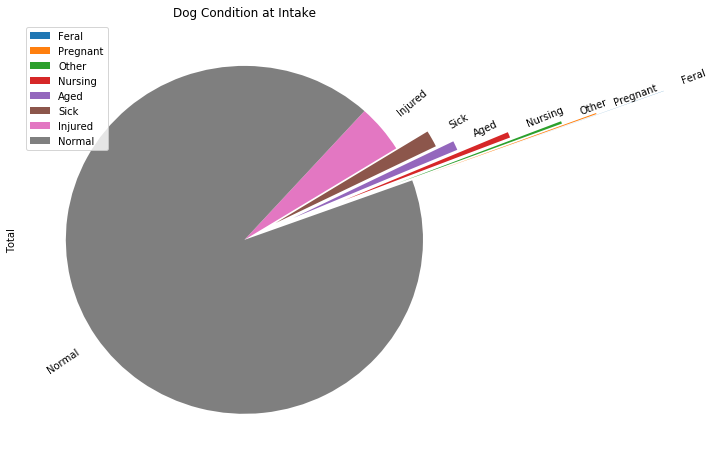

In [16]:
total_intake_type.plot.pie(title="Reasons for Dog Intake",y='Total', labels=total_intake_type['intake_type'], autopct='%1.0f%%', pctdistance=1.06, labeldistance=1.15, figsize=(8, 8))
plt.legend(loc='lower right')

explode = (1.5, 1.1, 0.9, 0.6, 0.3, 0.2, 0.0, 0.0)
total_intake_condition.plot.pie(title="Dog Condition at Intake", startangle=20, y='Total', explode=explode, labels=total_intake_condition['intake_condition'], labeldistance=1.1, rotatelabels=90, figsize=(8, 8))

Text(0.5,1,'Age Distribution of Adult Dogs (Over 1 Year)')

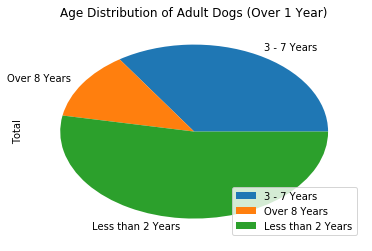

In [17]:
dogs_by_stage = grown_dogs_df.groupby(['stage']).size().reset_index(name='Total')
dogs_by_stage.plot.pie(y='Total', labels=['3 - 7 Years', 'Over 8 Years', 'Less than 2 Years'])
plt.legend(loc='lower right')
plt.title("Age Distribution of Adult Dogs (Over 1 Year)")

In [24]:
def getAgeBasedIntake(data, stage, varname):
    varname = data[['stage', 'intake_type']].copy()
    varname = varname.groupby(['stage', 'intake_type']).size().reset_index(name='Total')
    varname = varname[varname['stage'] == stage]
    return varname

intake_reason_for_young_dogs = getAgeBasedIntake(grown_dogs_df, 'young', 'intake_reason_for_young_dogs')
intake_reason_for_adult_dogs = getAgeBasedIntake(grown_dogs_df, 'adult', 'intake_reason_for_adult_dogs')
intake_reason_for_senior_dogs = getAgeBasedIntake(grown_dogs_df, 'senior', 'intake_reason_for_senior_dogs')

In [1]:
def getPieChart(data, labels, title):
    return data.plot.pie(y='Total', labels=data[labels], autopct='%1.0f%%', pctdistance=1.06, labeldistance=1.15, figsize=(8, 8)), plt.title(title), plt.legend(loc='lower right')
getPieChart(intake_reason_for_young_dogs, 'intake_type', 'Intake Reason for Young Dogs')
getPieChart(intake_reason_for_adult_dogs, 'intake_type', 'Intake Reason for Adult Dogs')
getPieChart(intake_reason_for_senior_dogs, 'intake_type', 'Intake Reason for Senior Dogs')

NameError: name 'intake_reason_for_young_dogs' is not defined